# Download ImageCollection
Here we download an imagecollection using the multiprocessing API

In [3]:
from pathlib import Path
import sys

import ee
import geemap
from geojson import Polygon

sys.path.append(str(Path.cwd().parent.parent.parent / "ee-packages-py"))

from eepackages.applications import bathymetry
from eepackages.utils import download_image_collection

In [4]:
Map = geemap.Map(center=(52.97, 4.74), zoom=11)
# (4.574518432617185, 52.91662291147939),
#     (4.90548156738281, 52.91662291147939),
#     (4.90548156738281, 53.02331125248889),
#     (4.574518432617185, 53.02331125248889),
#     (4.574518432617185, 52.91662291147939)
bounds = ee.Geometry(Polygon([[
    (4.574518432617185, 52.91662291147939),
    (4.90548156738281, 52.91662291147939),
    (4.90548156738281, 53.02331125248889),
    (4.574518432617185, 53.02331125248889),
    (4.574518432617185, 52.91662291147939)
]]))
scale = Map.getScale()
# scale = 30
start_date = "2019-01-01"
stop_date = "2021-01-01"

sdb = bathymetry.Bathymetry()
Map.addLayer(bounds)

In [5]:
scale = Map.getScale()

# Parameters 
start_date = '2016-01-01'
stop_date = '2028-01-01'

image = sdb.compute_intertidal_depth(
    bounds=bounds,
    start=start_date,
    stop=stop_date,
    scale=scale,
    missions=['S2', 'L8'],
    # filter: ee.Filter.dayOfYear(7*30, 9*30), # summer-only
    filter_masked=False, 
    # filterMasked: true, 
    # filterMaskedFraction: 0.5,
    skip_scene_boundary_fix=False,
    skip_neighborhood_search=False,
    neighborhood_search_parameters={"erosion": 0, "dilation": 0, "weight": 50},
    bounds_buffer=0,
    water_index_min=-0.05,
    water_index_max=0.15,

    # lowerCdfBoundary: 45,
    # upperCdfBoundary: 50
)  # .reproject(ee.Projection("EPSG:3857").atScale(90))

min = 0.04
max = 0.2
Map.addLayer(sdb.composite, { "min": min, "max": max }, 'red-green-blue')
Map

Map(center=[52.97, 4.74], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children…

In [6]:
!pip install retry

In [17]:
path = Path.cwd() / "output"
ic = sdb._raw_images.map(lambda img: img.clip(bounds))
download_image_collection(ic, out_dir=path)

KeyboardInterrupt: 

In [18]:
import os
os.listdir(path)

['ic_download_208.tiff.zip',
 'ic_download_92.tiff.zip',
 'ic_download_40.tiff.zip',
 'ic_download_166.tiff.zip',
 'ic_download_98.tiff.zip',
 'ic_download_246.tiff.zip',
 'ic_download_169.tiff.zip',
 'ic_download_239.tiff.zip',
 'ic_download_113.tiff.zip',
 'ic_download_137.tiff.zip',
 'ic_download_67.tiff.zip',
 'ic_download_7.tiff.zip',
 'ic_download_103.tiff.zip',
 'ic_download_87.tiff.zip',
 'ic_download_9.tiff.zip',
 'ic_download_56.tiff.zip',
 'ic_download_69.tiff.zip',
 'ic_download_206.tiff.zip',
 'ic_download_182.tiff.zip',
 'ic_download_237.tiff.zip',
 'ic_download_147.tiff.zip',
 'ic_download_24.tiff.zip',
 'ic_download_167.tiff.zip',
 'ic_download_197.tiff.zip',
 'ic_download_196.tiff.zip',
 'ic_download_123.tiff.zip',
 'ic_download_226.tiff.zip',
 'ic_download_148.tiff.zip',
 'ic_download_38.tiff.zip',
 'ic_download_229.tiff.zip',
 'ic_download_61.tiff.zip',
 'ic_download_1.tiff.zip',
 'ic_download_115.tiff.zip',
 'ic_download_135.tiff.zip',
 'ic_download_110.tiff.zip',
 

In [14]:
import zipfile


with zipfile.ZipFile(path / "ic_download_0.tiff.zip", mode="r") as zip_ref:
    zip_ref.extractall(path / "tiffs")

In [25]:
os.listdir(path / "tiffs")

['ic_download_0.swir.tif',
 'ic_download_0.green.tif',
 'ic_download_0.blue.tif',
 'ic_download_0.nir.tif',
 'ic_download_0.red.tif']

In [19]:
!pip install rasterio

     |████████████████████████████████| 19.2 MB 4.5 MB/s eta 0:00:01


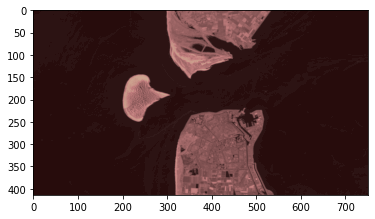

In [47]:
from matplotlib import pyplot
import numpy as np
import rasterio
from rasterio.merge import merge
from rasterio.plot import show

import glob

unzipped_tiffs = glob.glob(str(path / "tiffs") + "/*.tif")

array = rasterio.open(unzipped_tiffs[0]).read().squeeze()
pyplot.imshow(array, cmap='pink')

# bands = [rasterio.open(tif) for tif in unzipped_tiffs[:2]]
# mosaic = merge(bands)

# mosaic